### Data Loading

In [1]:
from keras.utils import get_file
import numpy as np

In [2]:
path = get_file('nietzsche.txt', origin = 'https://s3.amazonaws.com/text-datasets/nietzsche.txt')

In [3]:
text = open(path).read().lower()

In [4]:
print("Corpus length:", len(text), "characters")

Corpus length: 600901 characters


### Tokenizing sequences of characters

In [5]:
maxlen = 60
step = 3
sentences = []
next_chars = []

In [6]:
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i : i + maxlen])
    next_chars.append(text[i + maxlen])

print("Number of sequences:", len(sentences))

Number of sequences: 200281


In [7]:
chars = sorted(list(set(text)))
print("Unique characters:", len(chars))
print(chars)
char_indices = dict((char, chars.index(char)) for char in chars)

Unique characters: 59
['\n', ' ', '!', '"', "'", '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '¤', '¦', '©', '«', 'ã', '†']


In [8]:
print("Vectorizing using one-hot encoding....")

x = np.zeros(shape = (len(sentences), maxlen, len(chars)))
y = np.zeros(shape = (len(sentences), len(chars)))

for i, sentence in enumerate(sentences):
    for j, char in enumerate(sentence):
        x[i, j, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Vectorizing using one-hot encoding....


### Network Architecture

In [9]:
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt

In [10]:
model = Sequential()
model.add(layers.Bidirectional(layers.LSTM(140, input_shape = (maxlen, len(chars)))))
model.add(layers.Dense(len(chars), activation = 'softmax'))

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [12]:
history = model.fit(x, y, batch_size = 128, epochs = 60)

Epoch 1/60
1565/1565 [==============================] - 291s 182ms/step - loss: 2.5100 - accuracy: 0.2873
Epoch 2/60
1565/1565 [==============================] - 299s 191ms/step - loss: 2.1131 - accuracy: 0.3808
Epoch 3/60
1565/1565 [==============================] - 340s 217ms/step - loss: 1.9636 - accuracy: 0.4189
Epoch 4/60
1565/1565 [==============================] - 308s 197ms/step - loss: 1.8598 - accuracy: 0.4460
Epoch 5/60
1565/1565 [==============================] - 304s 194ms/step - loss: 1.7917 - accuracy: 0.4688
Epoch 6/60
1565/1565 [==============================] - 299s 191ms/step - loss: 1.7209 - accuracy: 0.4874
Epoch 7/60
1565/1565 [==============================] - 301s 192ms/step - loss: 1.6655 - accuracy: 0.5031
Epoch 8/60
1565/1565 [==============================] - 304s 194ms/step - loss: 1.6191 - accuracy: 0.5157
Epoch 9/60
1565/1565 [==============================] - 300s 191ms/step - loss: 1.5749 - accuracy: 0.5282
Epoch 10/60
1565/1565 [=======================

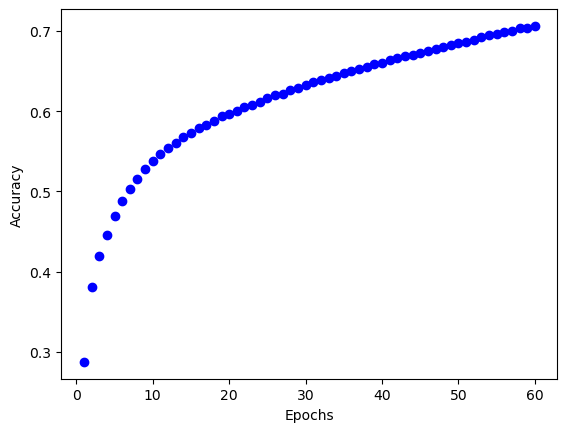

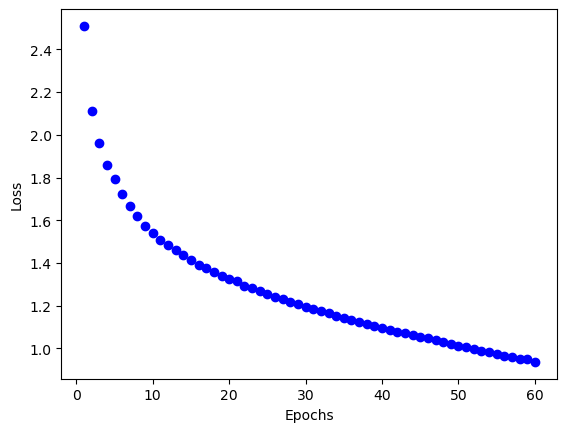

<Figure size 640x480 with 0 Axes>

In [13]:
#### Plotting the model performance

epochs = range(1, 61)

plt.plot(epochs, history.history['accuracy'], 'bo')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.figure()

plt.plot(epochs, history.history['loss'], 'bo')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()
plt.clf()

### Sampling using Softmax temperature

In [14]:
def sample(preds, temperature = 1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    prob_samp = np.random.multinomial(1, preds)
    return np.argmax(prob_samp)

### Text-generation loop

In [15]:
import sys

In [16]:
cond_data = "Having attained the age of thirty Zarathustra left\nhis home "

In [17]:
print("Conditioning Data length:", len(cond_data))

Conditioning Data length: 60


In [18]:
gen_len = 400
temperatures = [0.2, 0.5, 1.0, 1.2]

In [21]:
gen_text = cond_data.lower()

for temperature in temperatures:
    print()
    print("---------- temperature:", temperature)
    sys.stdout.write(cond_data)
    
    for i in range(gen_len):
        x_pred = np.zeros(shape = (1, maxlen, len(chars)))
        for j, char in enumerate(gen_text):
            x_pred[0, j, char_indices[char]] = 1
        
        pred = model.predict(x_pred, verbose = 0)[0]
        next_index = sample(pred, temperature)
        next_char = chars[next_index]
        
        gen_text += next_char
        gen_text = gen_text[1:]
        
        sys.stdout.write(next_char)
    print()


---------- temperature: 0.2
Having attained the age of thirty Zarathustra left
his home with a god at the science of "god," if a persent to the will
of religious contemptary new that the sense of his spirit, on the best of and evil of
the distinction of the present of person who is feel non yen his faculty for every
bod and forms and lives and the strength of the sense of discondentance for a commont men of the
instincts--and all the science of a ningure. the individual beings
man as

---------- temperature: 0.5
Having attained the age of thirty Zarathustra left
his home  a thing in the sinternice to be a misicust of the spirit and
ingmination, everything intellectual is in the strength of the
spirit and included. on the case of the possesse--if it is not
syoppeat feel as appare and things is not only the man heart
for every long. therefore it is menishm, and hat equally according
to the man bad and the most mand, and thereby the individual believed
be result hims

---------- temperat